In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from kjm2601 import obsidian_media_path as path


In [16]:
def solve_wavefunction_coefficients(A, k_I, V0, L):
#def solve_wavefunction_coefficients(A, k_I, k_II, k_III, L):
    """
    Solve for the coefficients B, C, D, and F in the wavefunction equations.

    Parameters:
    A (float): The amplitude of the incoming wave.
    k_I (float): The wave number in region I (z < 0).
    #k_II (float): The wave number in region II (0 < z < L).
    #k_III (float): The wave number in region III (z > L).
    V0 (float): The height of the barrier.
    L (float): The width of the barrier.

    Returns:
    B, C, D, F, k_II (floats): The coefficients of the wavefunction in the respective regions.
    """

    k_III = k_I
    E = 0.5 * k_I**2  # Energy of the incoming wave
    assert(E < V0)  # Ensure that the energy is less than the height of the barrier
    k_II = np.sqrt(V0 - E)

    # Define the matrix M
    M = np.array([
        [1, -1, -1, 0],
        [-k_I, 1j * k_II, -1j * k_II, 0],
        [0, np.exp(k_II * L), np.exp(-k_II * L), -np.exp(1j * k_III * L)],
        [0, k_II * np.exp(k_II * L), -k_II * np.exp(-k_II * L), -1j * k_III * np.exp(1j * k_III * L)]
    ])

    # Define the vector b
    b = np.array([-A, -k_I * A, 0, 0])

    # Solve the linear system Mv = b
    coefficients = np.linalg.solve(M, b)

    # Return the coefficients B, C, D, F
    B, C, D, F = coefficients
    return B, C, D, F, k_II

# Example parameters
A = 1.0  # Amplitude of the incoming wave
k_I = np.sqrt(2)  # Example value for k_I
V0 = 5.0
L = 1.5

# Solve for the coefficients
B, C, D, F, k_II = solve_wavefunction_coefficients(A, k_I, V0, L)
B, C, D, F, k_II

((-0.33040685497940225-0.9391761683096665j),
 (0.002747653840016912+0.0007817702916682155j),
 (0.6668454911805806-0.9399579386013349j),
 (-0.07274009350365086-0.0590619493318046j),
 2.0)

In [17]:
# Define a wavefunction. This is a wavefunction for a moving particle modelled as a wave packet.

def make_psi(x, sigma = 1.0, k = 3.0, x0 = 0.0):
    return np.exp(-0.5*((x-x0)/sigma)**2)*np.exp(1j*k*x)


def tunnelling_state(x, E, V0, L):
    V = np.zeros_like(x)
    V[(x > 0) & (x <= L)] = V0
    
    psi = np.zeros_like(x, dtype = complex)
    k1 = np.sqrt(2*E)
    A = 1.0
    B, C, D, F, k_II = solve_wavefunction_coefficients(A, k1, V0, L)
    xx = x[(x < 0)]
    psi[(x < 0)] = A*np.exp(1j*k1*xx) + B*np.exp(-1j*k1*xx)
    xx = x[(x > 0) & (x <= L)]
    psi[(x > 0) & (x <= L)] = C*np.exp(k_II*xx) + D*np.exp(-k_II*xx)
    xx = x[(x > L)]
    psi[(x > L)] = F*np.exp(1j*k1*xx)
    return V, psi

    
    


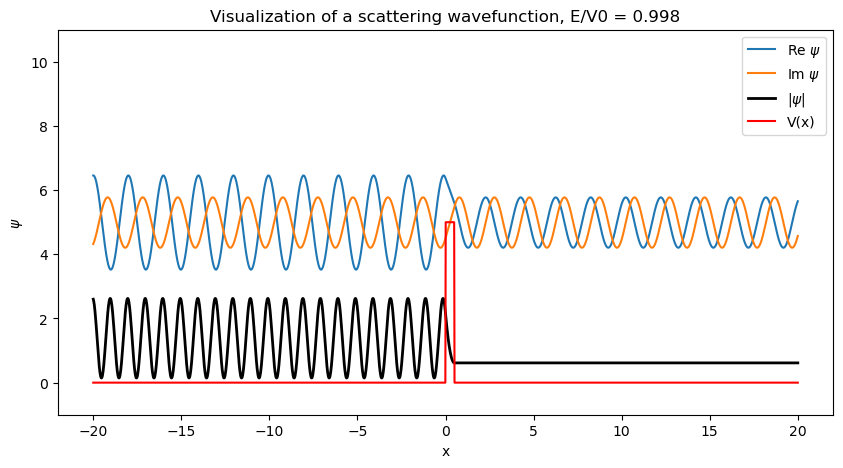

In [25]:
# Create a wavefunction
x = np.linspace(-20, 20, 2000)
V0 = 5
E = 4.99
L = 0.5
V, psi = tunnelling_state(x, E=E, V0 = V0, L = L)


energy_scale = 1.0
y_shift = E*energy_scale

plt.figure(figsize=(10, 5))
plt.plot(x, y_shift + np.real(psi), label='Re $\psi$')
plt.plot(x, y_shift + np.imag(psi), label='Im $\psi$')
plt.plot(x, np.abs(psi)**2, color='k', linewidth=2, label='$|\psi|$')
plt.plot(x, V * energy_scale, color='r', label='V(x)')
plt.ylim(-1, 2*V0*energy_scale + 1)
plt.xlabel('x')
plt.ylabel('$\psi$')
plt.legend(loc='upper right')
plt.title(f'Visualization of a scattering wavefunction, E/V0 = {E/V0:.3f}')
filename = path + f'lecture5_tunnelling_V0_{V0}_L_{L}_E_{E}.pdf'
plt.savefig(filename, bbox_inches='tight')
plt.show()



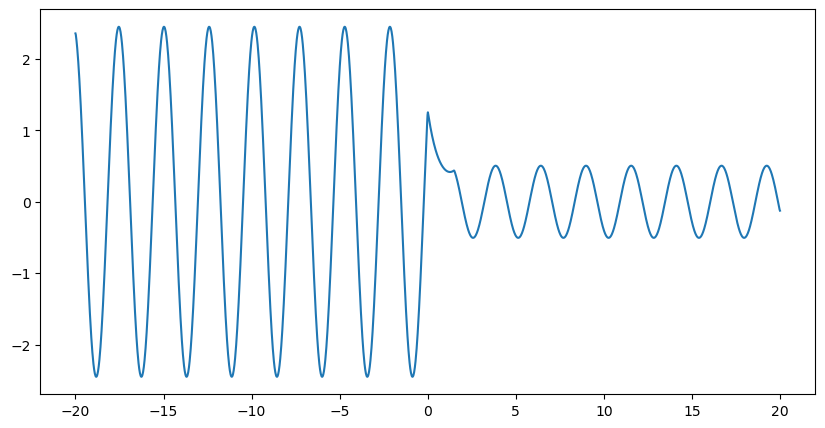

In [19]:
dpsidx = np.gradient(psi, x[1] - x[0])
plt.figure(figsize=(10, 5))
plt.plot(x, np.imag(dpsidx))
plt.show()